# Finding Player's Offensive Ratings

### Load Data

Load players' match data:

In [1]:
import pandas as pd
import numpy as np

pmd = pd.read_csv("../views/player_match_data_19-23.csv")

pmd

,e_code,t_code,element_type,Date,Mins,NPxG,NPG,xA,A,FA,season
0,126184,43,2,2022-08-07,90,0.04,0,0.01,0,0,22-23
1,121145,43,2,2022-08-07,90,0.02,0,0.05,0,0,22-23
2,61366,43,3,2022-08-07,87,0.16,0,0.31,1,0,22-23
3,209244,43,3,2022-08-07,87,0.00,0,0.33,0,0,22-23
4,171314,43,2,2022-08-07,90,0.00,0,0.01,0,0,22-23
...,...,...,...,...,...,...,...,...,...,...,...
42833,194799,45,2,2019-08-09,90,0.00,0,0.13,0,0,19-20
42834,78607,45,3,2019-08-09,90,0.00,0,0.00,0,0,19-20
42835,57127,45,4,2019-08-09,82,0.49,1,0.03,0,0,19-20
42836,71738,45,3,2019-08-09,58,0.16,0,0.00,0,0,19-20


Load teams' match data:

In [2]:
tmd = pd.read_csv("../views/teams_match_data_18-23.csv")

tmd

,t_code,Date,season,NPG,NPxG,NPxG_pred,A,xA,xA_pred,FA,FA_pred
0,1,2018-08-10,18-19,1,0.72,1.226257,1,0.30,0.839719,1,0.253249
1,13,2018-08-10,18-19,1,1.76,1.079296,0,0.98,0.739083,1,0.222898
2,4,2018-08-11,18-19,1,0.98,0.943674,1,0.87,0.646212,0,0.194889
3,-4,2018-08-11,18-19,0,1.59,1.051831,0,1.24,0.720276,0,0.217226
4,91,2018-08-11,18-19,2,1.41,1.534120,2,1.10,1.050539,0,0.316829
...,...,...,...,...,...,...,...,...,...,...,...
3795,54,2023-05-28,22-23,1,1.01,0.965168,1,1.34,0.660930,0,0.199328
3796,20,2023-05-28,22-23,4,0.89,0.967784,3,0.52,0.662721,0,0.199868
3797,14,2023-05-28,22-23,4,1.13,2.052544,3,0.38,1.405547,0,0.423895
3798,31,2023-05-28,22-23,1,1.47,1.351063,1,1.12,0.925184,0,0.279024


We need the team data for each player.

In [3]:
pmd = pmd.merge(tmd, on=['t_code', 'Date', 'season'], suffixes=[None, '_team'])

pd.set_option("display.max_columns", 20)
pmd

,e_code,t_code,element_type,Date,Mins,NPxG,NPG,xA,A,FA,season,NPG_team,NPxG_team,NPxG_pred,A_team,xA_team,xA_pred,FA_team,FA_pred
0,126184,43,2,2022-08-07,90,0.04,0,0.01,0,0,22-23,1,1.44,2.206891,1,1.58,1.511241,0,0.455771
1,121145,43,2,2022-08-07,90,0.02,0,0.05,0,0,22-23,1,1.44,2.206891,1,1.58,1.511241,0,0.455771
2,61366,43,3,2022-08-07,87,0.16,0,0.31,1,0,22-23,1,1.44,2.206891,1,1.58,1.511241,0,0.455771
3,209244,43,3,2022-08-07,87,0.00,0,0.33,0,0,22-23,1,1.44,2.206891,1,1.58,1.511241,0,0.455771
4,171314,43,2,2022-08-07,90,0.00,0,0.01,0,0,22-23,1,1.44,2.206891,1,1.58,1.511241,0,0.455771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42833,194799,45,2,2019-08-09,90,0.00,0,0.13,0,0,19-20,1,0.92,0.524380,1,0.56,0.359087,0,0.108296
42834,78607,45,3,2019-08-09,90,0.00,0,0.00,0,0,19-20,1,0.92,0.524380,1,0.56,0.359087,0,0.108296
42835,57127,45,4,2019-08-09,82,0.49,1,0.03,0,0,19-20,1,0.92,0.524380,1,0.56,0.359087,0,0.108296
42836,71738,45,3,2019-08-09,58,0.16,0,0.00,0,0,19-20,1,0.92,0.524380,1,0.56,0.359087,0,0.108296


Check data types and nulls:

In [4]:
pmd = pmd.astype({'Date':'datetime64[D]', 'season':'category'})

pmd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42838 entries, 0 to 42837
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   e_code        42838 non-null  int64         
 1   t_code        42838 non-null  int64         
 2   element_type  42838 non-null  int64         
 3   Date          42838 non-null  datetime64[ns]
 4   Mins          42838 non-null  int64         
 5   NPxG          42838 non-null  float64       
 6   NPG           42838 non-null  int64         
 7   xA            42838 non-null  float64       
 8   A             42838 non-null  int64         
 9   FA            42838 non-null  int64         
 10  season        42838 non-null  category      
 11  NPG_team      42838 non-null  int64         
 12  NPxG_team     42838 non-null  float64       
 13  NPxG_pred     42838 non-null  float64       
 14  A_team        42838 non-null  int64         
 15  xA_team       42838 non-null  float6

### Building the Model

Lets split the match data into players so we can work on them individually.

In [5]:
# Ensure the order is correct
pmd = pmd.sort_values('Date')

# Team stats are recorded over 90+ mins, so lets get an effective matches played column
pmd['eff_games'] = pmd['Mins'] / 90

In [6]:
# Group by player and team (keeping player ratings seperate for different teams)
grps = pmd.groupby(['e_code', 't_code'])

# Select select sample group
grp = grps.get_group((118748, 14))  # Mo Salah

grp

,e_code,t_code,element_type,Date,Mins,NPxG,NPG,xA,A,FA,season,NPG_team,NPxG_team,NPxG_pred,A_team,xA_team,xA_pred,FA_team,FA_pred,eff_games
42819,118748,14,3,2019-08-09,90,0.34,1,0.19,1,0,19-20,4,1.84,2.474172,3,1.39,1.694270,1,0.510970,1.000000
42411,118748,14,3,2019-08-17,78,0.45,0,0.02,0,0,19-20,2,1.29,1.770128,2,0.56,1.212153,0,0.365570,0.866667
42119,118748,14,3,2019-08-24,90,0.77,1,0.47,0,0,19-20,2,1.72,2.061677,2,1.45,1.411800,0,0.425781,1.000000
41810,118748,14,3,2019-08-31,90,0.19,0,0.12,1,0,19-20,3,1.00,1.802296,2,0.60,1.234181,1,0.372213,1.000000
41717,118748,14,3,2019-09-14,90,0.58,1,0.48,0,0,19-20,3,3.04,1.812267,2,1.99,1.241009,1,0.374272,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8901,118748,14,3,2023-05-03,83,0.37,0,0.11,0,0,22-23,0,1.04,2.397043,0,0.65,1.641453,1,0.495041,0.922222
10228,118748,14,3,2023-05-06,90,0.97,1,0.14,0,0,22-23,1,2.24,2.078365,1,1.44,1.423228,0,0.429228,1.000000
10410,118748,14,3,2023-05-15,87,0.94,0,0.43,3,0,22-23,3,2.15,2.111510,3,1.56,1.445925,0,0.436073,0.966667
10956,118748,14,3,2023-05-20,90,0.10,0,0.42,1,0,22-23,1,0.75,2.002326,1,1.11,1.371158,0,0.413524,1.000000


We are going to a use an ELO style model to find player ratings.

In [7]:
def find_rating(grp, true, pred, eff_n, init, lr, return_grp=False):
    rating = init

    ratings = []
    for idx, row in grp.iterrows():
        ratings.append(rating)

        delta = row[true] - rating*row[eff_n]*row[pred]
        rating += row[eff_n] * lr * delta
    
    if return_grp:
        grp['ratings'] = ratings
        return grp
    return rating

# Using example parameters
find_rating(grp, 'NPxG', 'NPxG_pred', 'eff_games', 0.2, 0.02)

0.24123604612621916

A NPxG rating of 24% of the team's goals is in line with what I expect from previous work and knowledge of Salah's statistics. However, to get optimal parameters, we must work over all of the data.

The first thing I want to do is seperate the problem by element_type (position), as I believe they will have different optimal parameters.

Let's start with element_type 4 -- AKA forwards. The way we will find the optimal parameters is setting the optimal parameter to the mean rating of the group, then use that parameter to grid search the 'lr' (learning rate) parameter. Then we use the new 'lr' parameter to find a more accuate 'init' parameter and so on.

In [8]:
subset = pmd.loc[pmd.element_type == 4]

def find_mean(subset, true, pred, eff_n):
    return subset[true].sum() / (subset[eff_n] * subset[pred]).sum()

mean = find_mean(subset, 'NPxG', 'NPxG_pred', 'eff_games')

mean

0.27786198525189576

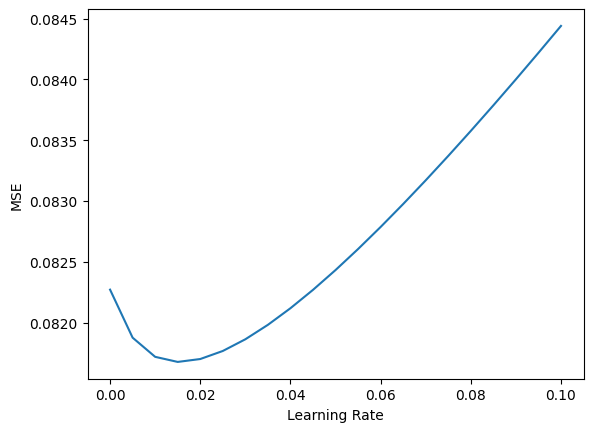

In [9]:
def compute_lr_mses(df, lr_list, func, true, pred, eff_n, init, real_pred):
    mse_list = []
    for lr in lr_list:
        df = df.groupby(['e_code', 't_code'], group_keys=False).apply(
                func,
                true,
                pred,
                eff_n,
                init,
                lr,
                True
            )
        resids = df[true] - df['ratings']*df[eff_n]*df[real_pred]
        mse = np.mean(resids ** 2)
        mse_list.append(mse)
    return mse_list

lr_list = np.linspace(0, 0.1, 21)
mse_list = compute_lr_mses(subset, lr_list, find_rating, 'NPxG', 'NPxG_pred', 'eff_games', mean, 'NPxG_pred')

import matplotlib.pyplot as plt
plt.plot(lr_list, mse_list)
plt.xlabel('Learning Rate')
plt.ylabel('MSE')
plt.show()

As you can see, the error is lowest when the learning rate is between 0.01 and 0.02. That said, the error doesn't change dramatically -- demonstrating the noisy nature of the data. In fact, the naive model of giving players a rating based on a simple global mean is only marginally worse. We should keep track of the R-squared score to see if we need to reevaluate the model.

In [10]:
def r2_score(df, func, true, pred, eff_n, init, lr, real_pred):
    mean = find_mean(df, true, pred, eff_n)

    df = df.groupby(['e_code', 't_code'], group_keys=False).apply(
            func,
            true,
            pred,
            eff_n,
            init,
            lr,
            True
        )
    resids = df[true] - df['ratings']*df[eff_n]*df[real_pred]
    SSR = np.sum(resids ** 2)
    SST = np.sum((df[true] - mean*df[eff_n]*df[real_pred]) ** 2)
    return 1 - (SSR/SST)

r2_score(subset, find_rating, 'NPxG', 'NPxG_pred', 'eff_games', mean, 0.015, 'NPxG_pred')

0.007220781444814639

The model only explains 0.7% of the variance, making it nearly useless. We should try another 'pred' column: NPxG_team.

In [11]:
mean = find_mean(subset, 'NPxG', 'NPxG_team', 'eff_games')

mean

0.2767811689685896

The mean is almost exactly the same, which is ideal for a direct comparison with R2 score.

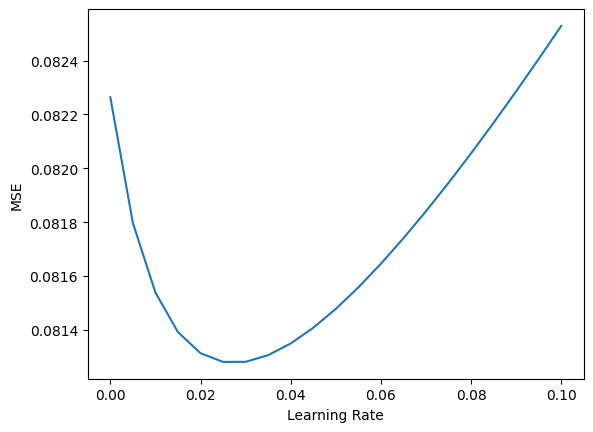

In [12]:
lr_list = np.linspace(0, 0.1, 21)
mse_list = compute_lr_mses(subset, lr_list, find_rating, 'NPxG', 'NPxG_team', 'eff_games', mean, 'NPxG_pred')

plt.plot(lr_list, mse_list)
plt.xlabel('Learning Rate')
plt.ylabel('MSE')
plt.show()

The optimal learning rate is higher and the MSE is lower, which is better.

In [13]:
r2_score(subset, find_rating, 'NPxG', 'NPxG_team', 'eff_games', mean, 0.027, 'NPxG_pred')

0.011991166907726614

But it's still bad.

We did only try forwards though. Maybe they are very uniform, making a naive mean model quite sufficient. Midfielders, however, can vary much more: from defensive holding midfielders to offensive wingers. Let's try that.

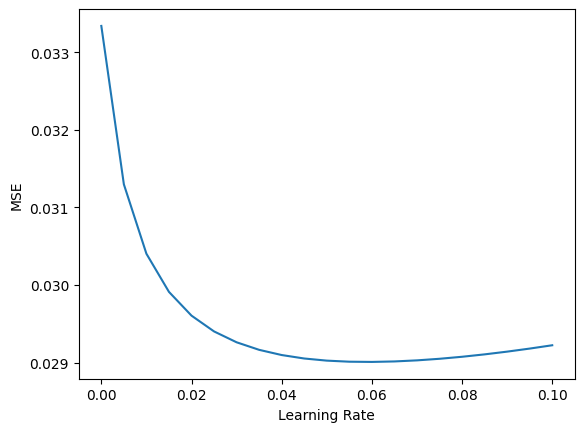

In [14]:
subset = pmd.loc[pmd.element_type == 3]

mean = find_mean(subset, 'NPxG', 'NPxG_team', 'eff_games')

lr_list = np.linspace(0, 0.1, 21)
mse_list = compute_lr_mses(subset, lr_list, find_rating, 'NPxG', 'NPxG_team', 'eff_games', mean, 'NPxG_pred')

plt.plot(lr_list, mse_list)
plt.xlabel('Learning Rate')
plt.ylabel('MSE')
plt.show()

The naive mean model does appear to perform much worse! The optimal learning rate is much higher too. Let's check the R2 score.

In [15]:
r2_score(subset, find_rating, 'NPxG', 'NPxG_team', 'eff_games', mean, 0.06, 'NPxG_pred')

0.12995433461518036

This is a much better score. However, the significant differences between how forwards and midfielders repsond to the model suggests that most of the signal comes from the positioning of a player. Also, the shape of last graph right is very shallow after reaching the minimum error, suggesting that once the player's ratings reaches their equilibrium, there's not much use in the iterative nature of the model.

A better model by one that adjusts less with time i.e. a decreasing learning rate. This way, a player can reach equilibrium quickly and then stay close to their true rating.

First, let's create a new column: cumulative effective samples.

In [16]:
# Add new column
pmd['cum_eff_games'] = grps['eff_games'].cumsum()

# Group by player and team (keeping player ratings seperate for different teams)
grps = pmd.groupby(['e_code', 't_code'])

# Select select sample group
grp = grps.get_group((118748, 14))  # Mo Salah

grp

,e_code,t_code,element_type,Date,Mins,NPxG,NPG,xA,A,FA,...,NPG_team,NPxG_team,NPxG_pred,A_team,xA_team,xA_pred,FA_team,FA_pred,eff_games,cum_eff_games
42819,118748,14,3,2019-08-09,90,0.34,1,0.19,1,0,...,4,1.84,2.474172,3,1.39,1.694270,1,0.510970,1.000000,1.000000
42411,118748,14,3,2019-08-17,78,0.45,0,0.02,0,0,...,2,1.29,1.770128,2,0.56,1.212153,0,0.365570,0.866667,1.866667
42119,118748,14,3,2019-08-24,90,0.77,1,0.47,0,0,...,2,1.72,2.061677,2,1.45,1.411800,0,0.425781,1.000000,2.866667
41810,118748,14,3,2019-08-31,90,0.19,0,0.12,1,0,...,3,1.00,1.802296,2,0.60,1.234181,1,0.372213,1.000000,3.866667
41717,118748,14,3,2019-09-14,90,0.58,1,0.48,0,0,...,3,3.04,1.812267,2,1.99,1.241009,1,0.374272,1.000000,4.866667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8901,118748,14,3,2023-05-03,83,0.37,0,0.11,0,0,...,0,1.04,2.397043,0,0.65,1.641453,1,0.495041,0.922222,129.855556
10228,118748,14,3,2023-05-06,90,0.97,1,0.14,0,0,...,1,2.24,2.078365,1,1.44,1.423228,0,0.429228,1.000000,130.855556
10410,118748,14,3,2023-05-15,87,0.94,0,0.43,3,0,...,3,2.15,2.111510,3,1.56,1.445925,0,0.436073,0.966667,131.822222
10956,118748,14,3,2023-05-20,90,0.10,0,0.42,1,0,...,1,0.75,2.002326,1,1.11,1.371158,0,0.413524,1.000000,132.822222


In [17]:
# Inverse decay
def find_rating_dcy(grp, true, pred, eff_n, init, lr, return_grp=False):
    cum_eff_n = "cum_" + eff_n
    rating = init

    ratings = []
    for idx, row in grp.iterrows():
        ratings.append(rating)

        delta = row[true] - rating*row[eff_n]*row[pred]
        rating += row[eff_n] * lr * delta / row[cum_eff_n]
    
    if return_grp:
        grp['ratings'] = ratings
        return grp
    return rating

# Using example parameters
find_rating_dcy(grp, 'NPxG', 'NPxG_pred', 'eff_games', mean, 1)

0.2589659023449057

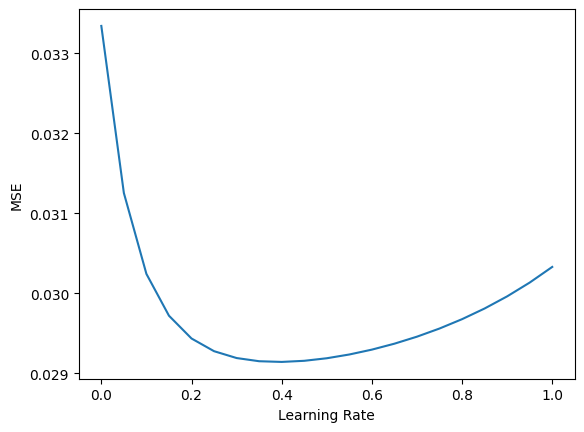

In [18]:
subset = pmd.loc[pmd.element_type == 3].copy()

lr_list = np.linspace(0, 1, 21)
mse_list = compute_lr_mses(subset, lr_list, find_rating_dcy, 'NPxG', 'NPxG_team', 'eff_games', mean, 'NPxG_pred')

plt.plot(lr_list, mse_list)
plt.xlabel('Learning Rate')
plt.ylabel('MSE')
plt.show()

Much higher learning rate, as expected. However, the MSE of the base is similar.

In [19]:
r2_score(subset, find_rating_dcy, 'NPxG', 'NPxG_team', 'eff_games', mean, 0.4, 'NPxG_pred')

0.12594394207026183

In fact, the R2 score is lower. Maybe the decay is too strong. Let's try a version where we take the square root of the cumulative sample.

In [20]:
def find_rating_sqrt_dcy(grp, true, pred, eff_n, init, lr, return_grp=False):
    cum_eff_n = "cum_" + eff_n
    rating = init

    ratings = []
    for idx, row in grp.iterrows():
        ratings.append(rating)

        delta = row[true] - rating*row[eff_n]*row[pred]
        rating += row[eff_n] * lr * delta / np.sqrt(row[cum_eff_n])
    
    if return_grp:
        grp['ratings'] = ratings
        return grp
    return rating

# Using example parameters
find_rating_dcy(grp, 'NPxG', 'NPxG_pred', 'eff_games', mean, 1)

0.2589659023449057

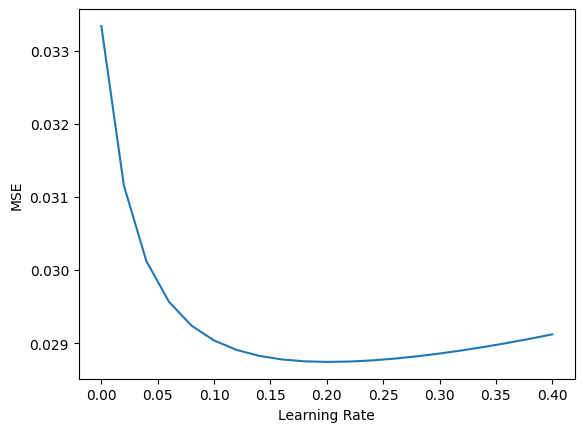

In [21]:
lr_list = np.linspace(0, 0.4, 21)
mse_list = compute_lr_mses(subset, lr_list, find_rating_sqrt_dcy, 'NPxG', 'NPxG_team', 'eff_games', mean, 'NPxG_pred')

plt.plot(lr_list, mse_list)
plt.xlabel('Learning Rate')
plt.ylabel('MSE')
plt.show()

In [22]:
r2_score(subset, find_rating_sqrt_dcy, 'NPxG', 'NPxG_team', 'eff_games', mean, 0.2, 'NPxG_pred')

0.13787813258414305

A modest improvement. Before we proceed with this model, I would like to compare this model to a simple cumulative mean.

In [23]:
# Get relevant cumulative sums
subset['eff_NPxG_team'] = subset['eff_games'] * subset['NPxG_team']
subset[['cum_NPxG', 'cum_eff_NPxG_team']] = subset.groupby(['e_code', 't_code'], observed = True)[['NPxG', 'eff_NPxG_team']].cumsum()

# Calculate new rating (including init)
NPxG_mean = subset['NPxG'].mean()
eff_NPxG_team_mean = subset['eff_NPxG_team'].mean()
subset['new_rating'] = (NPxG_mean + subset['cum_NPxG']) / (eff_NPxG_team_mean + subset['cum_eff_NPxG_team'])

# Get rating from previous match for non-retrospective prediction
subset['rating'] = subset.groupby(['e_code', 't_code'], group_keys=False)['new_rating'].apply(lambda x: x.shift(1))
subset['rating'] = subset['rating'].fillna(mean)

# Salah's data
subset.loc[subset.e_code == 118748, ['new_rating', 'rating']].head(5)

,new_rating,rating
42819,0.158526,0.108241
42411,0.228132,0.158526
42119,0.295100,0.228132
41810,0.279269,0.295100
41717,0.251478,0.279269


In [24]:
# Get player predictions
subset['NPxG_pred_player'] = subset['rating'] * subset['eff_games'] * subset['NPxG_pred']

subset.loc[subset.e_code == 118748, ['NPxG', 'NPxG_pred_player']].head(10)

,NPxG,NPxG_pred_player
42819,0.34,0.267806
42411,0.45,0.243197
42119,0.77,0.470335
41810,0.19,0.531857
41717,0.58,0.506109
41203,0.05,0.314393
41162,0.61,0.374553
40843,1.01,0.348842
40116,0.34,0.507968
40022,0.38,0.403304


In [25]:
import sklearn.metrics as metrics

metrics.r2_score(subset['NPxG'], subset['NPxG_pred_player'])

0.2121702221777897

OK. That's considerably stronger. Clearly, a cumulative mean makes sense. However, I am curious if an exponential decay might offer more flexibility and predictive power.

In [26]:
# Shift columns by one to get stats from previous games (cannot shift with Pandas inbuilt ewm)
subset[['NPxG_last', 'eff_NPxG_team_last']] = subset.groupby(['e_code', 't_code'], group_keys=False)[['NPxG', 'eff_NPxG_team']].apply(lambda x: x.shift(1))
subset['NPxG_last'] = subset['NPxG_last'].fillna(
    subset['NPxG'].mean()
)
subset['eff_NPxG_team_last'] = subset['eff_NPxG_team_last'].fillna(
    subset['eff_NPxG_team'].mean()
)

subset.loc[subset.e_code == 118748, ['NPxG', 'NPxG_last', 'eff_NPxG_team', 'eff_NPxG_team_last']]

,NPxG,NPxG_last,eff_NPxG_team,eff_NPxG_team_last
42819,0.34,0.103991,1.840000,0.960740
42411,0.45,0.340000,1.118000,1.840000
42119,0.77,0.450000,1.720000,1.118000
41810,0.19,0.770000,1.000000,1.720000
41717,0.58,0.190000,3.040000,1.000000
...,...,...,...,...
8901,0.37,0.120000,0.959111,1.410000
10228,0.97,0.370000,2.240000,0.959111
10410,0.94,0.970000,2.078333,2.240000
10956,0.10,0.940000,0.750000,2.078333


In [27]:
# Perform exponentially weighted mean (unoptimised alpha decay parameter)
ewms = subset.groupby(['e_code', 't_code'], sort=False)[['NPxG_last', 'eff_NPxG_team_last']].ewm(alpha=0.03).mean()

# Add new ewm columns
ewms = ewms.reset_index().set_index('level_2')
subset = subset.join(ewms, rsuffix='_ewm')
 
subset.loc[subset.e_code == 118748]

,e_code,t_code,element_type,Date,Mins,NPxG,NPG,xA,A,FA,...,cum_eff_NPxG_team,new_rating,rating,NPxG_pred_player,NPxG_last,eff_NPxG_team_last,e_code_ewm,t_code_ewm,NPxG_last_ewm,eff_NPxG_team_last_ewm
42819,118748,14,3,2019-08-09,90,0.34,1,0.19,1,0,...,1.840000,0.158526,0.108241,0.267806,0.103991,0.960740,118748,14,0.103991,0.960740
42411,118748,14,3,2019-08-17,78,0.45,0,0.02,0,0,...,2.958000,0.228132,0.158526,0.243197,0.340000,1.840000,118748,14,0.223793,1.407065
42119,118748,14,3,2019-08-24,90,0.77,1,0.47,0,0,...,4.678000,0.295100,0.228132,0.470335,0.450000,1.118000,118748,14,0.301503,1.307760
41810,118748,14,3,2019-08-31,90,0.19,0,0.12,1,0,...,5.678000,0.279269,0.295100,0.531857,0.770000,1.720000,118748,14,0.424032,1.415576
41717,118748,14,3,2019-09-14,90,0.58,1,0.48,0,0,...,8.718000,0.251478,0.279269,0.506109,0.190000,1.000000,118748,14,0.374331,1.327322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8901,118748,14,3,2023-05-03,83,0.37,0,0.11,0,0,...,249.398222,0.261920,0.261444,0.577949,0.120000,1.410000,118748,14,0.460217,1.826362
10228,118748,14,3,2023-05-06,90,0.97,1,0.14,0,0,...,251.638222,0.263437,0.261920,0.544365,0.370000,0.959111,118748,14,0.457473,1.799985
10410,118748,14,3,2023-05-15,87,0.94,0,0.43,3,0,...,253.716556,0.264978,0.263437,0.537709,0.970000,2.240000,118748,14,0.473055,1.813362
10956,118748,14,3,2023-05-20,90,0.10,0,0.42,1,0,...,254.466556,0.264592,0.264978,0.530573,0.940000,2.078333,118748,14,0.487245,1.821415


In [28]:
# Calculate new rating
subset['rating_ewm'] = subset['NPxG_last_ewm'] / subset['eff_NPxG_team_last_ewm']

subset.loc[subset.e_code == 118748, ['rating', 'rating_ewm']].tail(10)

,rating,rating_ewm
8063,0.263322,0.259597
9772,0.265505,0.268797
9576,0.265570,0.268928
9368,0.264251,0.263376
8975,0.262446,0.256000
8901,0.261444,0.251985
10228,0.261920,0.254154
10410,0.263437,0.260872
10956,0.264978,0.267509
11057,0.264592,0.265800


In [29]:
# Get player predictions
subset['NPxG_pred_player_ewm'] = subset['rating_ewm'] * subset['eff_games'] * subset['NPxG_pred']

metrics.r2_score(subset['NPxG'], subset['NPxG_pred_player_ewm'])

0.21152634077945798

A marginally worse score, but that's without tweaking for the optimal decay parameter. Let's optimise it now.

In [30]:
# # Remove ewm related calculations
subset = subset.drop(columns=['NPxG_last_ewm', 'eff_NPxG_team_last_ewm', 'e_code_ewm', 't_code_ewm', 'rating_ewm', 'NPxG_pred_player_ewm'])
init_subset = subset.copy()

subset.columns

Index(['e_code', 't_code', 'element_type', 'Date', 'Mins', 'NPxG', 'NPG', 'xA',
       'A', 'FA', 'season', 'NPG_team', 'NPxG_team', 'NPxG_pred', 'A_team',
       'xA_team', 'xA_pred', 'FA_team', 'FA_pred', 'eff_games',
       'cum_eff_games', 'eff_NPxG_team', 'cum_NPxG', 'cum_eff_NPxG_team',
       'new_rating', 'rating', 'NPxG_pred_player', 'NPxG_last',
       'eff_NPxG_team_last'],
      dtype='object')

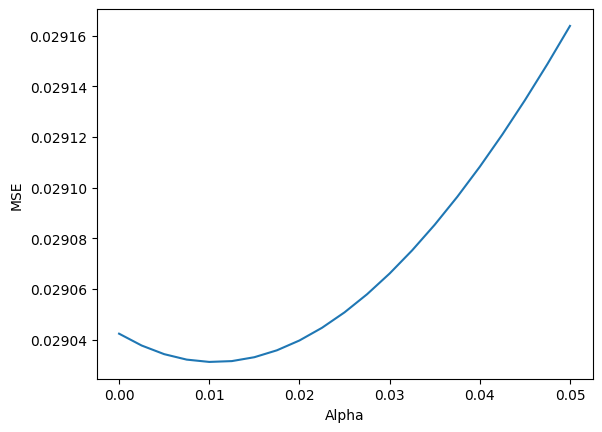

In [31]:
def compute_alpha_mses(source_df, alpha_list, true_last, eff_pred_last, true, eff_n, real_pred, metric=metrics.mean_squared_error):
    def measure_alpha(df, alpha):
        # Perform exponentially weighted mean (unoptimised alpha decay parameter)
        ewms = df.groupby(['e_code', 't_code'], sort=False)[[true_last, eff_pred_last]].ewm(alpha=alpha).mean()

        # Add new ewm columns
        ewms = ewms.reset_index().set_index('level_2')
        df = df.join(ewms, rsuffix='_ewm')

        # Get rating
        df['rating_ewm'] = df[true_last+'_ewm'] / df[eff_pred_last+'_ewm']

        # Get predictions
        df[true+'_pred_player_ewm'] = df['rating_ewm'] * df[eff_n] * df[real_pred]

        # Get mse
        return metric(df[true], df[true+'_pred_player_ewm'])

    mses = []
    # Iterate through parameters
    for alpha in alpha_list:
        mses.append(measure_alpha(source_df, alpha))
    return mses

# Start from the beginning
subset = init_subset.copy()
alpha_list = np.linspace(0.0000001, 0.05, 21)
mses = compute_alpha_mses(subset, alpha_list, 'NPxG_last', 'eff_NPxG_team_last', 'NPxG', 'eff_games', 'NPxG_pred')

# Plot
plt.plot(alpha_list, mses)
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.show()

I tried alpha = 0.03 before, so I will see an improvement with 0.011. More importantly, alpha = 0 is the cumulative mean case, and the error intially decreases with alpha, meaning that we have an improvement!

In [32]:
alpha_list = [0.011]
compute_alpha_mses(subset, alpha_list, 'NPxG_last', 'eff_NPxG_team_last', 'NPxG', 'eff_games', 'NPxG_pred', metrics.r2_score)

[0.21247312457315548]

0.21247312457315548 > 0.2121702221777897. Just.

While this improvement seems hardly worth pursuing over a simpler cumulative mean model, it might be because player positions are mostly stable. The exponential decay model may perform significantly better in the rare case where a player starts playing out of position. But, out-of-position players are an important aspect of FPL and should be considered. This model continue to perform even better as time goes on. Therefore, I will keep it, and find the optimal parameters for all players and types of rating.

In [33]:
def get_req_columns(subset, true, true_team, eff_n):
    eff_true_team = 'eff_' + true_team
    true_last = true + '_last'
    eff_true_team_last = eff_true_team + '_last'

    # eff_true_team
    subset[eff_true_team] = subset[eff_n] * subset[true_team]

    # Shift columns by one to get stats from previous games (cannot shift with Pandas inbuilt ewm)
    subset[[true_last, eff_true_team_last]] = subset.groupby(['e_code', 't_code'], group_keys=False)\
            [[true, eff_true_team]].apply(lambda x: x.shift(1))
    subset[true_last] = subset[true_last].fillna(
        subset[true].mean()
    )
    subset[eff_true_team_last] = subset[eff_true_team_last].fillna(
        subset[eff_true_team].mean()
    )

    return subset, true_last, eff_true_team_last

element_types = [1, 2, 3, 4]
ratings = {
    'NPxG':(
        'NPxG',
        'NPxG_team',
        'NPxG_pred'
    ),
    'xA':(
        'xA',
        'xA_team',
        'xA_pred'
    )
}

# Effective samples
optimal_alphas = {}
pmd['eff_n'] = pmd['Mins'] / 90
for element_type in element_types:
    subset = pmd.loc[pmd.element_type == element_type].copy()
    optimal_alphas[element_type] = {}
    for name, cols in ratings.items():
        true, true_team, pred_team = cols

        # Preprocessing
        subset, true_last, eff_true_team_last = get_req_columns(subset, true, true_team, 'eff_n')

        # Search
        alpha_list = np.linspace(0.0000001, 0.015, 301)
        r2s = compute_alpha_mses(subset, alpha_list, true_last, eff_true_team_last, true, 'eff_n', pred_team, metrics.r2_score)

        # Zip the two lists together
        zipped_list = zip(r2s, alpha_list)

        # Find the alpha with the lowest error
        min_error, min_alpha = max(zipped_list)
        
        # Add optimal to dict
        optimal_alphas[element_type][name] = min_alpha, min_error > 0

        # Print result
        print(f"For element type {element_type}'s {name} rating:\n\talpha: {min_alpha}, R-squared: {min_error}.")

print(optimal_alphas)

For element type 1's NPxG rating:
	alpha: 1e-07, R-squared: -0.03249722772131913.
For element type 1's xA rating:
	alpha: 1e-07, R-squared: -0.014227525553128562.
For element type 2's NPxG rating:
	alpha: 0.008500043333333334, R-squared: 0.023526771141591407.
For element type 2's xA rating:
	alpha: 0.0015500896666666667, R-squared: 0.18348698019994358.
For element type 3's NPxG rating:
	alpha: 0.010600029333333334, R-squared: 0.21247357279264045.
For element type 3's xA rating:
	alpha: 1e-07, R-squared: 0.19773595561074686.
For element type 4's NPxG rating:
	alpha: 0.0008500943333333333, R-squared: 0.17051077359830236.
For element type 4's xA rating:
	alpha: 1e-07, R-squared: 0.07743453908889675.
{1: {'NPxG': (1e-07, False), 'xA': (1e-07, False)}, 2: {'NPxG': (0.008500043333333334, True), 'xA': (0.0015500896666666667, True)}, 3: {'NPxG': (0.010600029333333334, True), 'xA': (1e-07, True)}, 4: {'NPxG': (0.0008500943333333333, True), 'xA': (1e-07, True)}}


Goalkeepers seem to better off with a global mean (not surprising). I can do that in the postprocessing. The assist ratings of attacking players are stable enough for a simple cumulative mean approach.

For completion, lets get the latest ratings of every (player, team) group.

In [34]:
optimal_alphas = {
    1: {
        'NPxG': (1e-07, False), 
        'xA': (1e-07, False)
        }, 
    2: {
        'NPxG': (0.0085, True), 
        'xA': (0.00155, True)
        }, 
    3: {
        'NPxG': (0.0106, True), 
        'xA': (1e-07, True)
        }, 
    4: {
        'NPxG': (0.00085, True), 
        'xA': (1e-07, True)
        }
    }

def get_latest_rating(df, alpha, true, true_team, eff_n):
    # eff_true_team
    eff_true_team = 'eff_' + true_team
    df[eff_true_team] = df[eff_n] * df[true_team]

    # Find means
    true_mean = df[true].mean()
    eff_true_team_mean = df[eff_true_team].mean()

    # Prepend row to each group
    def prepend_row(group):
        new_row = pd.DataFrame({
            'e_code': group.name[0], 
            't_code': group.name[1],
            true: true_mean, 
            eff_true_team: eff_true_team_mean
            }, index=[0])
        return pd.concat([new_row, group])
    df = df.groupby(['e_code', 't_code']).apply(prepend_row).reset_index(drop=True)

    # Perform exponentially weighted mean (unoptimised alpha decay parameter)
    ewm = df.groupby(['e_code', 't_code'], sort=False)[[true, eff_true_team]].ewm(alpha=alpha).mean()

    # Get retrospective ratings
    ewm['rating'] = ewm[true] / ewm[eff_true_team]

    # Get final ratings
    return ewm.groupby(['e_code', 't_code'])['rating'].last()

# Create dict
series_dict = {}
series_dict['NPxG'] = []
series_dict['xA'] = []

pmd['eff_n'] = pmd['Mins'] / 90
for element_type in optimal_alphas.keys():
    subset = pmd.loc[pmd.element_type == element_type].copy()
    for true, alpha_tuple in optimal_alphas[element_type].items():
        alpha = alpha_tuple[0]
        ratings = get_latest_rating(subset, alpha, true, true+'_team', 'eff_n')
        ratings = pd.DataFrame(ratings)
        ratings['element_type'] = element_type
        series_dict[true].append(ratings)

s1 = pd.concat(series_dict['NPxG'])
s2 = pd.concat(series_dict['xA'])
ratings_df = pd.DataFrame(s1).join(s2, lsuffix='_NPxG', rsuffix='_xA')
ratings_df.drop(columns='element_type_NPxG', inplace=True)
ratings_df = ratings_df.reset_index()
ratings_df = ratings_df.rename(columns={
    'rating_NPxG':'xG Rating', 
    'rating_xA':'xA Rating', 
    'element_type_xA':'element_type'
    })
ratings_df

,e_code,t_code,xG Rating,xA Rating,element_type
0,7645,49,0.004477,0.013107,2
1,8432,7,0.000015,0.000167,1
2,9089,57,0.001331,0.002055,1
3,12745,11,0.009133,0.133237,2
4,14937,1,0.328922,0.065857,4
...,...,...,...,...,...
1249,533463,91,0.194081,0.139522,3
1250,535928,14,0.069754,0.071150,3
1251,536916,36,0.102546,0.060024,3
1252,547719,4,0.081235,0.105484,3


That's every player who has every played's rating for optimal predictions.

Let's also finish off by getting all of the global means for new player's ratings and goalkeepers.

In [35]:
means = pd.DataFrame(columns=['element_type', 'NPxG', 'xA'])

for element_type in [1, 2, 3, 4]:
    row = [element_type]
    q = pmd.element_type == element_type
    for true, true_team in [('NPxG', 'NPxG_team'), ('xA', 'xA_team')]:
        mean = pmd.loc[q, true].sum() / (pmd.loc[q, 'eff_n'] * pmd.loc[q, true_team]).sum()
        row.append(mean)

    means.loc[-1] = row  # adding a row
    means.index = means.index + 1
means['element_type'] = means['element_type'].astype(int)
means = means.set_index('element_type')

means

,NPxG,xA
element_type,,
1,0.000156,0.001587
2,0.038959,0.063493
3,0.108241,0.128565
4,0.276781,0.098854


In [36]:
# Add dummy data for new players with no games
ratings_df.loc[-1] = [-1, -1, np.nan, np.nan, 2]
ratings_df.index = ratings_df.index + 1

# Map means for Goalkeepers
ratings_df.loc[ratings_df.element_type == 1, 'xG Rating'] = means.loc[1, 'NPxG']
ratings_df.loc[ratings_df.element_type == 1, 'xA Rating'] = means.loc[1, 'xA']

# Map means for new players
cols = ratings_df.columns
ratings_df = ratings_df.merge(means, on='element_type')
ratings_df['xG Rating'] = ratings_df['xG Rating'].fillna('NPxG')
ratings_df['xA Rating'] = ratings_df['xA Rating'].fillna('xA')
ratings_df = ratings_df.astype({'e_code':int, 't_code':int, 'element_type':int})

ratings_df[cols]

,e_code,t_code,xG Rating,xA Rating,element_type
0,7645,49,0.004477,0.013107,2
1,12745,11,0.009133,0.133237,2
2,15033,13,0.055117,0.009473,2
3,15149,91,0.01468,0.04283,2
4,17761,11,0.073295,0.069255,2
...,...,...,...,...,...
1250,532529,36,0.096348,0.117939,3
1251,533463,91,0.194081,0.139522,3
1252,535928,14,0.069754,0.07115,3
1253,536916,36,0.102546,0.060024,3
